In [1]:
import requests
from bs4 import BeautifulSoup
import time
from tqdm.notebook import tqdm
from urllib.parse import quote

import pandas as pd
import selenium
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

In [37]:
# 셀레니움으로 네이버 창 열기
driver = webdriver.Chrome()
url = "https://search.naver.com/search.naver?sm=tab_hty.top&where=nexearch&query=%EC%98%81%ED%99%94&oquery=%EC%98%81%ED%99%94+%EC%95%84%EB%B0%94%ED%83%80&tqi=iaX7Llp0J1ZssSx9h9ZssssstjZ-258685"
driver.get(url)
time.sleep(1)

In [10]:
best_movie = pd.read_excel("역대.xlsx", header=4, engine="openpyxl")
best_movie['영화명']

0              명량
1            극한직업
2       신과함께-죄와 벌
3            국제시장
4      어벤져스: 엔드게임
          ...    
196        비긴 어게인
197            태풍
198            킹콩
199        부러진 화살
200           NaN
Name: 영화명, Length: 201, dtype: object

In [38]:
movie_name = best_movie['영화명'][0]
keyword = "영화 "+ movie_name +" 평점"
keyword

'영화 명량 평점'

In [43]:
# 검색어 입력 및 검색
driver.find_element(By.CSS_SELECTOR,'div.greenbox input#nx_query').clear()
driver.find_element(By.CSS_SELECTOR,'div.greenbox input#nx_query').send_keys(keyword)
driver.find_element(By.CSS_SELECTOR,'button.bt_search').click()
time.sleep(2)

In [92]:
# 리뷰 스크롤 내리기
driver.find_element(By.CSS_SELECTOR,'div.lego_review_list._scroller').click()

# 10번
for i in range(0,10):
    driver.find_element(By.XPATH,'/html/body').send_keys(Keys.END)
    time.sleep(0.5)

<html data-platform="win32" data-useragent="mozilla/5.0 (windows nt 10.0; win64; x64) applewebkit/537.36 (khtml, like gecko) chrome/113.0.0.0 safari/537.36" lang="ko"><head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="width=device-width,initial-scale=1.0,maximum-scale=2.0" name="viewport"/> <meta content="영화 명량 평점 : 네이버 통합검색" property="og:title"/> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'영화 명량 평점'의 네이버 통합검색 결과입니다." property="og:description"/> <meta content="'영화 명량 평점'의 네이버 통합검색 결과입니다." lang="ko" name="description"/> <title>영화 명량 평점 : 네이버 통합검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"/><
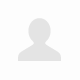
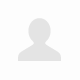

In [45]:
soup = BeautifulSoup(driver.page_source, "html.parser")
soup

In [47]:
제목 = soup.select_one('div._au_movie_content_wrap span strong._text').text
제목

'명량'

In [77]:
전체 = soup.select_one('span.area_star_number').text
참여자수 = soup.select_one('span.area_people').text.split('명 참여')[0]
남자 = soup.select_one('div.area_card_male span.area_star_number').text
여자 = soup.select_one('div.area_card_female span.area_star_number').text
print(전체, 참여자수, 남자, 여자)

8.88 28,765 8.82 8.94


In [91]:
_10대 = soup.select_one('div.lego_rating_box_age ul.area_graph_age li:nth-child(1) span.this_text_num').text
_20대 = soup.select_one('div.lego_rating_box_age ul.area_graph_age li:nth-child(2) span.this_text_num').text
_30대 = soup.select_one('div.lego_rating_box_age ul.area_graph_age li:nth-child(3) span.this_text_num').text
_40대 = soup.select_one('div.lego_rating_box_age ul.area_graph_age li:nth-child(4) span.this_text_num').text
_50대 = soup.select_one('div.lego_rating_box_age ul.area_graph_age li:nth-child(5) span.this_text_num').text
print(_10대, _20대, _30대, _40대, _50대)

9.18 8.92 8.76 8.84 8.82


In [123]:
lis = soup.select('div.lego_review_list._scroller ul._item_wrapper li')
li= lis[0]
관람객별점 = li.select_one('div.area_text_box').text.split('별점(10점 만점 중)')[1]
관람객리뷰 = li.select_one('div.area_text_expand span.desc._text').text.strip()
print(관람객별점, 관람객리뷰)

8 그냥 뭐...  애국심으로 보는 재미인듯


In [109]:
# 평론가 클릭 및 스크롤 내리기
driver.find_element(By.CSS_SELECTOR,'div.cm_tap_area._tab_wrap ul li:nth-child(2) a span').click()
driver.find_element(By.CSS_SELECTOR,'div.lego_critic_outer._scroller').click()

for i in range(0,10):
    driver.find_element(By.XPATH,'/html/body').send_keys(Keys.END)
    time.sleep(0.5)

In [124]:
lis = soup.select('div.lego_critic_outer._scroller ul.area_ulist li')
li= lis[1]
평론가별점 = li.select_one('div.area_text_box').text.split('별점(10점 만점 중)')[1]
평론가리뷰 = li.select_one('div.area_text_expand').text.strip()
print(평론가별점, 평론가리뷰)

6.75 수식 없는 묵직한 정공법으로 끝까지 밀어붙인다. 비장하고 진지하고 숙연하다. 해전 신의 놀라운 밀도에 비해 이순신을 제외한 캐릭터들의 아쉬운 배치와 활용은 극의 밀도를 떨어뜨린다. 펼쳐보기


In [12]:
best_movie = pd.read_excel("역대.xlsx", header=4, engine="openpyxl")

df1 = []
df2 = []
df3 = []

# 셀레니움으로 네이버 창 열기
driver = webdriver.Chrome()
url = "https://search.naver.com/search.naver?sm=tab_hty.top&where=nexearch&query=%EC%98%81%ED%99%94&oquery=%EC%98%81%ED%99%94+%EC%95%84%EB%B0%94%ED%83%80&tqi=iaX7Llp0J1ZssSx9h9ZssssstjZ-258685"
driver.get(url)
time.sleep(1)

for movie_name in best_movie['영화명'][:10]:
    
    # 검색어 설정
    keyword = "영화 "+ movie_name +" 평점"
    
    # 검색어 입력 및 검색
    driver.find_element(By.CSS_SELECTOR,'div.greenbox input#nx_query').clear()
    driver.find_element(By.CSS_SELECTOR,'div.greenbox input#nx_query').send_keys(keyword)
    driver.find_element(By.CSS_SELECTOR,'button.bt_search').click()
    time.sleep(2)
    
    # 관람객 리뷰 스크롤 10번 내리기
    driver.find_element(By.CSS_SELECTOR,'div.lego_review_list._scroller').click()
    time.sleep(1)

    for i in range(0,10):
        driver.find_element(By.XPATH,'/html/body').send_keys(Keys.END)
        time.sleep(1)
        
    # 평론가 클릭 및 스크롤 내리기
    driver.find_element(By.CSS_SELECTOR,'div.cm_tap_area._tab_wrap ul li:nth-child(2) a span').click()
    driver.find_element(By.CSS_SELECTOR,'div.lego_critic_outer._scroller').click()

    for i in range(0,10):
        driver.find_element(By.XPATH,'/html/body').send_keys(Keys.END)
        time.sleep(1)
    
    soup = BeautifulSoup(driver.page_source, "html.parser")
    
    제목 = soup.select_one('div._au_movie_content_wrap span strong._text').text
    전체 = soup.select_one('span.area_star_number').text
    참여자수 = soup.select_one('span.area_people').text.split('명 참여')[0]
    남자 = soup.select_one('div.area_card_male span.area_star_number').text
    여자 = soup.select_one('div.area_card_female span.area_star_number').text
    
    _10대 = soup.select_one('div.lego_rating_box_age ul.area_graph_age li:nth-child(1) span.this_text_num').text
    _20대 = soup.select_one('div.lego_rating_box_age ul.area_graph_age li:nth-child(2) span.this_text_num').text
    _30대 = soup.select_one('div.lego_rating_box_age ul.area_graph_age li:nth-child(3) span.this_text_num').text
    _40대 = soup.select_one('div.lego_rating_box_age ul.area_graph_age li:nth-child(4) span.this_text_num').text
    _50대 = soup.select_one('div.lego_rating_box_age ul.area_graph_age li:nth-child(5) span.this_text_num').text

    df1.append([movie_name, 제목, 전체, 참여자수, 남자, 여자, _10대, _20대, _30대, _40대, _50대])
    
    # 관람객 리뷰
    lis1 = soup.select('div.lego_review_list._scroller ul._item_wrapper li')
    
    for li1 in lis1:
        관람객별점 = li1.select_one('div.area_text_box').text.split('별점(10점 만점 중)')[1]
        관람객리뷰 = li1.select_one('div.area_text_expand span.desc._text').text.strip()
        df2.append([movie_name, 제목, 관람객별점, 관람객리뷰])
        
    # 평론가 리뷰
    lis2 = soup.select('div.lego_critic_outer._scroller ul.area_ulist li')
    
    for li2 in lis2:
        평론가별점 = li2.select_one('div.area_text_box').text.split('별점(10점 만점 중)')[1]
        평론가리뷰 = li2.select_one('div.area_text_expand').text.strip()
        df3.append([movie_name, 제목, 평론가별점, 평론가리뷰])

star = pd.DataFrame(df1, columns=['movie_name', '제목', '전체', '참여자수', '남자', '여자', '_10대', '_20대', '_30대', '_40대', '_50대'])
review = pd.DataFrame(df2, columns=['movie_name', '제목', '관람객별점', '관람객리뷰'])
critic_review = pd.DataFrame(df3, columns=['movie_name', '제목', '평론가별점', '평론가리뷰'])

In [4]:
star

,movie_name,제목,전체,참여자수,남자,여자,_10대,_20대,_30대,_40대,_50대
0,명량,명량,8.88,"28,765",8.82,8.94,9.18,8.92,8.76,8.84,8.82
1,극한직업,극한직업,9.20,"15,943",9.16,9.24,9.43,9.32,9.22,9.09,8.82
2,신과함께-죄와 벌,신과함께-죄와 벌,8.73,"26,217",8.71,8.75,9.09,8.76,8.66,8.73,8.44
3,국제시장,국제시장,9.16,"20,296",9.21,9.11,9.41,9.20,9.09,9.11,9.14
4,어벤져스: 엔드게임,어벤져스: 엔드게임,9.50,"31,975",9.52,9.45,9.81,9.65,9.48,9.16,8.89
5,겨울왕국 2,겨울왕국 2,8.95,"6,015",8.88,8.99,9.37,9.10,8.97,8.69,8.88
6,베테랑,베테랑,9.24,"22,764",9.24,9.25,9.51,9.33,9.19,9.06,9.08
7,아바타,아바타: 물의 길,8.82,"4,887",8.70,9.02,9.20,8.81,8.81,8.88,8.69
8,도둑들,도둑들,7.65,"20,992",6.92,8.35,8.24,7.62,7.03,7.64,7.16
9,7번방의 선물,7번방의 선물,8.83,"45,892",8.26,9.35,9.28,8.72,8.34,8.83,8.45


In [9]:
review

,movie_name,제목,관람객별점,관람객리뷰
0,명량,명량,8,그냥 뭐... 애국심으로 보는 재미인듯
1,명량,명량,8,영상과 연출력은 대단하다
2,명량,명량,1,와 이런 영화를 보고도 엄청 재밌다고 하다니.. 보는 내내 어처구니가 없었구먼. 진...
3,명량,명량,10,"아는 만큼 보이고, 느낄 수 있는 영화... 이 영화를 단순 국뽕영화라고 취급하는 ..."
4,명량,명량,1,어벤져스한테 따라잡힐 준비해라
...,...,...,...,...
975,7번방의 선물,7번방의 선물,4,1000만 관객 동원했다고 해서 봤다. 재밌다가 지루하다가 웃기다가 다시 재밌다가 ...
976,7번방의 선물,7번방의 선물,1,관객들 울리는거 말고는 하는게 없는 허접 신파극
977,7번방의 선물,7번방의 선물,10,재밌고 감동적. 명영화 몇번을 돌려보는지..!
978,7번방의 선물,7번방의 선물,10,다시봐도 명작... 실제로 보상기한 10일지났다고 잘난 이 거지같은 나라에서 보상도...


In [8]:
review['제목'].value_counts()

명량            110
극한직업          110
신과함께-죄와 벌     110
어벤져스: 엔드게임    110
겨울왕국 2        110
도둑들           110
7번방의 선물       110
국제시장          100
베테랑           100
아바타: 물의 길      10
Name: 제목, dtype: int64

In [11]:
review[review['제목']=="국제시장"]

,movie_name,제목,관람객별점,관람객리뷰
330,국제시장,국제시장,10,다시 봤는데 또 움....
331,국제시장,국제시장,10,대한민국의 역사를 한남자의 인생과 함께 무한한 감동으로 함께 했다.몇번을 봐도 나를...
332,국제시장,국제시장,8,노인분장은 어색하지만 스토리는 슬펐음
333,국제시장,국제시장,10,개봉당시 영화관가서 봤었는데 이번에 설특집하는거보고 적습니다 단연 최고의 영화ㅠ 어...
334,국제시장,국제시장,10,황정민 주연 적품 중 가장 좋아합니다. 처음으로 극장에서 두번 본 영화.
...,...,...,...,...
425,국제시장,국제시장,10,넘잼나요 국제시장대박
426,국제시장,국제시장,10,쵱고이비다추천해용 짱
427,국제시장,국제시장,10,재밌었다 계속생각나게끔 하는 영화다
428,국제시장,국제시장,7,감동스러운 영화! 잘봤습니다!


In [6]:
critic_review

,movie_name,제목,평론가별점,평론가리뷰
0,명량,명량,7.0,캐릭터에 대한 깊이 있는 고찰이나 당대에 대한 역사의식이나 고증의 완벽함에 대한 기...
1,명량,명량,6.75,수식 없는 묵직한 정공법으로 끝까지 밀어붙인다. 비장하고 진지하고 숙연하다. 해전 ...
2,명량,명량,6.0,해전신은 꽤 볼만하다
3,명량,명량,5.0,인물은 흐릿하고 해전만 요란하다
4,명량,명량,6.0,"해상 전투는 순류, 나머지는 역류. 반반 무(武) 많이"
...,...,...,...,...
87,7번방의 선물,7번방의 선물,7.0,비현실적인 서사. 지적 장애인은 여전히 레인 맨. 눈물 흘릴 것을 겁박하고 감성을 ...
88,7번방의 선물,7번방의 선물,7.0,"기적같은 스토리를 현실화 시키는 건 배우의 몫이다. 류승룡을 비롯, 오달수, 박원상..."
89,7번방의 선물,7번방의 선물,7.0,"대놓고 판타지에 신파라는 것을 알고도 기분 좋게 속는다. 배우 앙상블이 좋지만, 단..."
90,7번방의 선물,7번방의 선물,6.0,충무로식 기획 코미디의 재미


In [10]:
critic_review['제목'].value_counts()

명량            10
극한직업          10
신과함께-죄와 벌     10
어벤져스: 엔드게임    10
베테랑           10
아바타: 물의 길     10
도둑들           10
국제시장           8
겨울왕국 2         8
7번방의 선물        6
Name: 제목, dtype: int64